In [ ]:
!pip install matplotlib
!pip install pandas
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv("E:/Projects/TCO/Datasets/TestCaseDataset.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TEST ID          100 non-null    object 
 1   TEST CASE        100 non-null    object 
 2   PRE-CONDITIONS   100 non-null    object 
 3   TEST STEPS       12 non-null     object 
 4   PRECEDENCE       100 non-null    object 
 5   COMPLEXITY       100 non-null    int64  
 6   TEST DATA        0 non-null      float64
 7   EXPECTED RESULT  0 non-null      float64
 8   ACTUAL RESULT    0 non-null      float64
 9   PASS/FAIL        0 non-null      float64
dtypes: float64(4), int64(1), object(5)
memory usage: 7.9+ KB


In [30]:
df.isna().sum()

TEST ID              0
TEST CASE            0
PRE-CONDITIONS       0
TEST STEPS          88
PRECEDENCE           0
COMPLEXITY           0
TEST DATA          100
EXPECTED RESULT    100
ACTUAL RESULT      100
PASS/FAIL          100
dtype: int64

In [31]:
df

,TEST ID,TEST CASE,PRE-CONDITIONS,TEST STEPS,PRECEDENCE,COMPLEXITY,TEST DATA,EXPECTED RESULT,ACTUAL RESULT,PASS/FAIL
0,LOAD_001,Test Page load functionality through URL,None,Enter Invalid URL,H,8,NaN,NaN,NaN,NaN
1,LOAD_002,Test Page Reload without crashes,None,NaN,H,3,NaN,NaN,NaN,NaN
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,NaN,L,3,NaN,NaN,NaN,NaN
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,Choose city from name and icons,M,6,NaN,NaN,NaN,NaN
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,Choose city by Search Bar,M,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,NaN,M,4,NaN,NaN,NaN,NaN
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,NaN,H,10,NaN,NaN,NaN,NaN
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,NaN,H,6,NaN,NaN,NaN,NaN
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,NaN,H,7,NaN,NaN,NaN,NaN


In [32]:
df['PASS/FAIL'].unique()

array([nan])

In [33]:
df['TEST DATA'].unique()

array([nan])

In [34]:
df1 = df.drop(['TEST STEPS','TEST DATA','EXPECTED RESULT','ACTUAL RESULT','PASS/FAIL'],axis=1)

In [35]:
df1.columns.values.tolist()

['TEST ID', 'TEST CASE', 'PRE-CONDITIONS', 'PRECEDENCE', 'COMPLEXITY']

In [36]:
df1['PRE-CONDITIONS'].unique()

array(['None', 'LOAD_001', 'SELECT_CITY_001', 'SELECT_CITY_002',
       'SELECT_CITY_003', 'HOME_001', 'SIGN_IN_001', 'SIGN_UP_001',
       'SEARCHBAR_001', 'CATEGORY_001', 'RECOMMEND_001', 'MOVIE_LOAD_001',
       'BOOK_LOAD_001', 'SHOWTIME_001', 'SHOWTIME_002', 'SEATS_001',
       'SEATS_002', 'SEATS_003', 'PAY_BUTTON_001', 'PAY_BUTTON_002',
       'PAY_INIT_001', 'PAYMENT_OPT_003', 'MOB_WALLET_002', 'VOUCHER_003',
       'UPI_001', 'UPI_002', 'PAY_INIT_002', 'PAY_PORTAL_002',
       'PAY_PORTAL_003', 'CONFIRM_001', 'SESSION_002', 'SESSION_003',
       'SESSION_001', 'EVENT_DETAIL_001', 'EVENT_DETAIL_004',
       'BOOK_EVENT_001', 'BOOK_EVENT_003', 'BOOK_EVENT_004'], dtype=object)

In [37]:
dummies = pd.get_dummies(df1['PRECEDENCE'])
df1 = pd.concat([df1,dummies],axis=1)
df1

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,6,0,0,1
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,5,0,0,1
...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,4,0,0,1
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,10,1,0,0
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,6,1,0,0
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,7,1,0,0


In [38]:
pre_count = [0]*df["TEST ID"].count()
df1['PRECON_COUNT'] = pre_count 
df1

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRECON_COUNT
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0,0
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,6,0,0,1,0
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,4,0,0,1,0
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,10,1,0,0,0
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,6,1,0,0,0
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,7,1,0,0,0


In [39]:
for ids in df1['TEST ID']:
    if ids in df1['PRE-CONDITIONS'].values:
       df1.loc[ df1['TEST ID'] == ids, 'PRECON_COUNT' ]= df1.loc[ df1['PRE-CONDITIONS'] == ids, 'TEST ID' ].count()
       
       for sub in list(df1.loc[df1['PRE-CONDITIONS'] == ids,'TEST ID']):
                if(sub in df1['PRE-CONDITIONS'].values):
                   df1.loc[ df1['TEST ID'] == ids,'PRECON_COUNT' ] += len(df1.loc[df1['PRE-CONDITIONS']==sub,'TEST ID'])            

In [40]:
df1

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRECON_COUNT
0,LOAD_001,Test Page load functionality through URL,None,H,8,1,0,0,12
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,6,0,0,1,1
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,5,0,0,1,1
...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,4,0,0,1,2
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,10,1,0,0,1
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,6,1,0,0,0
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,7,1,0,0,0


In [41]:
weights = [0]*df1["COMPLEXITY"].count()
df1["WEIGHTAGE"] = weights

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TEST ID         100 non-null    object
 1   TEST CASE       100 non-null    object
 2   PRE-CONDITIONS  100 non-null    object
 3   PRECEDENCE      100 non-null    object
 4   COMPLEXITY      100 non-null    int64 
 5   H               100 non-null    uint8 
 6   L               100 non-null    uint8 
 7   M               100 non-null    uint8 
 8   PRECON_COUNT    100 non-null    int64 
 9   WEIGHTAGE       100 non-null    int64 
dtypes: int64(3), object(4), uint8(3)
memory usage: 5.9+ KB


In [43]:
df1["WEIGHTAGE"] = (df1["H"]*0.9 + df1["M"]*0.5 + df1["L"]*0.1 +df1["PRECON_COUNT"])*df1["COMPLEXITY"]

In [45]:
df1.to_csv('Datasets/TestcaseDataset_updated.csv')

**OBJECTIVE FUNCTION**

In [18]:
def objectiveFunction(args):
  x1,x2,x3,x4,x5 = args
  if(x1==x2 and x1==x3):
    x2=x3=0
  if(x2==x3):
    x3=0
  if(x1>x2 and x1>x3):
    x2=x3=0
  if(x2>x1 and x2>x3):
    x1=x3=0
  if(x3>x1 and x3>x2):
    x1=x2=0
  return (x1*0.9 + x2*0.5 + x3*0.1 + x4)*x5

In [19]:
import time
from GA import GeneticAlgorithm
iterations=50

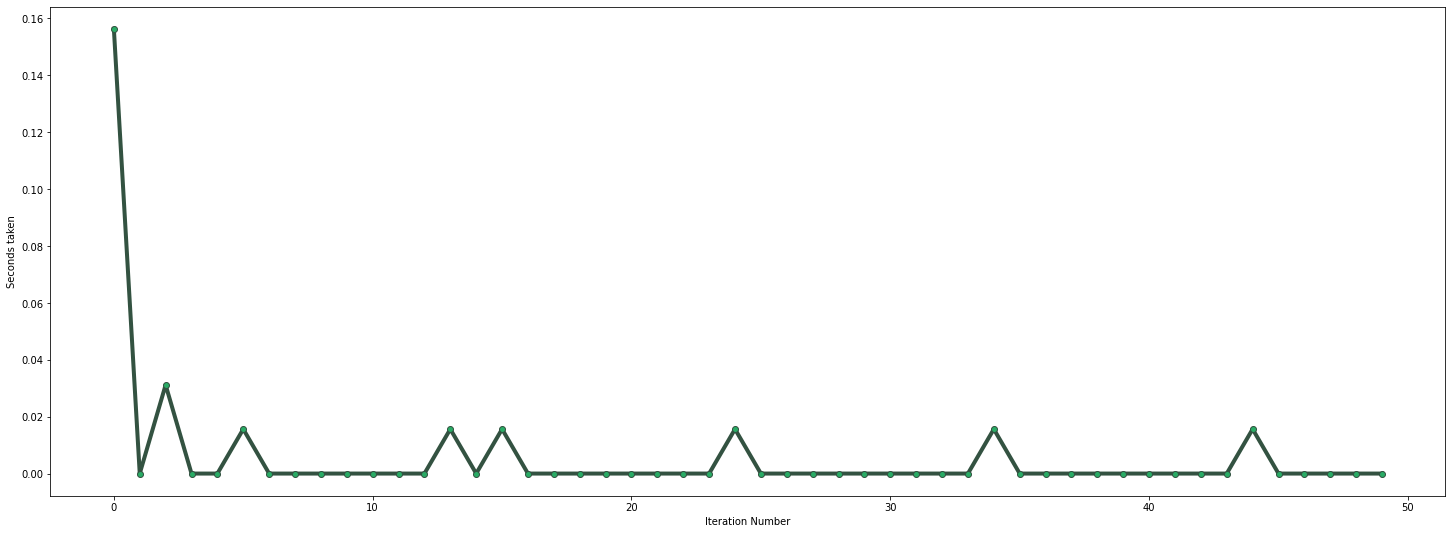

Best values for x: [ 1  1  1 21 10]
Best value for f(x): 219.0


In [20]:
start_of_ga = time.time()

ga = GeneticAlgorithm(
    fitness_function = objectiveFunction,
    pop_size = 100,
    genome_length = 5,
    lb = [0, 0, 0, df1['PRECON_COUNT'].min(), df1['COMPLEXITY'].min()],
    ub = [1, 1, 1, df1['PRECON_COUNT'].max(), df1['COMPLEXITY'].max()]
)
ga.generate_binary_population()
ga.number_of_pairs = 4
ga.selective_pressure = 1.4
ga.mutation_rate = 0.2
ga.run(iterations)

time_dif = time.time() - start_of_ga

best_genome, best_fitness = ga.get_best_genome()
print("Best values for x: {}".format(best_genome))
print("Best value for f(x): {}".format(best_fitness))

In [21]:
#Time taken by GA
print("GA took",time_dif,"to run")

GA took 1.8907454013824463 to run


# Result of GA

In [22]:
ga_df = df1

In [23]:
ga_df['Diff'] = (best_fitness - ga_df['WEIGHTAGE'])
ga_df.sort_values('Diff',axis=0,inplace=True)

In [24]:
ga_df = ga_df.drop(['H','L','M'],axis=True)
ga_df = ga_df.reset_index(drop=True)

In [25]:
ga_df

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,PRECON_COUNT,WEIGHTAGE,Diff
0,PAY_INIT_001,Check load of Payment page,PAY_BUTTON_002,H,9,22,206.1,12.9
1,HOME_001,Test load of Home Page,LOAD_001,H,9,16,152.1,66.9
2,LOAD_001,Test Page load functionality through URL,None,H,8,12,103.2,115.8
3,PAY_PORTAL_003,Test redirect to Confirmation Page,PAY_PORTAL_002,H,8,8,71.2,147.8
4,PAY_PORTAL_002,Test Transaction confirmation,PAY_INIT_002,H,10,6,69.0,150.0
...,...,...,...,...,...,...,...,...
95,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,0.3,218.7
96,SHOWTIME_003,Test display of Showtime selected,PAY_INIT_001,L,2,0,0.2,218.8
97,LOGIN_003,Check switch to Login Button,SIGN_IN_001,L,2,0,0.2,218.8
98,HOME_005,Test Return to Home Page on Logo Click,HOME_001,L,2,0,0.2,218.8


In [26]:
ga_df.to_csv("Results/GA_result.csv")